Mid-Term Assignment Submission 2023

> **Submitted By:** Nimul Islam Emon

> **Student ID:** 0422062146



### Loading of Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import h5py
from sklearn.model_selection import train_test_split

In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/Dataset 2/train_happy (1).h5', "r")
    test_dataset = h5py.File('/content/drive/MyDrive/Dataset 2/test_happy (1).h5', "r")

    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()

#%% Splitting the Train Set
train_set_y_orig = train_set_y_orig.transpose()
X_train, X_validation, y_train, y_validation = train_test_split(train_set_x_orig, train_set_y_orig, test_size=0.20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()

In [ ]:
X_train = np.reshape(train_set_x_orig, (train_set_x_orig.shape[0], -1))
Y_train=train_set_y_orig
X_test = np.reshape(test_set_x_orig, (test_set_x_orig.shape[0], -1))
Y_test=test_set_y_orig
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(600, 12288) (600,) (150, 12288) (150,)


### Plotting of Data

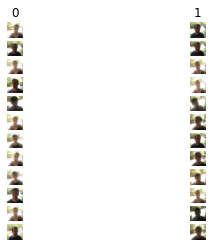

In [ ]:
num_classes = len(classes)
samples_per_class = 12
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_set_y_orig == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_set_x_orig[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

12 samples from the training dataset were plotted.

 Logistic regression algorithm

### Sigmoid function as the activation function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """

    return 1/ (1 + np.exp(-z))

## Calculation of Cost Function and Gradient
Here x(i) is the input and y(i) is the target.

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [ ]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """

    m=len(y)

    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)

    grad = 1/m * np.dot(X.transpose(),(predictions - y))

    return cost[0] , grad

### Feature scaling od the Data
A numpy array of X values are taken and  normalize X values are returned.IT normalizes the range of independent variables or features of data.

  

In [ ]:
def featureNormalization(X):

    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)

    X_norm = (X - mean)/std

    return X_norm , mean , std

In [ ]:
X=X_train
y=Y_train

In [ ]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559947
Gradient at initial theta (zeros): [[0.        ]
 [0.03011658]
 [0.05251867]
 ...
 [0.02634625]
 [0.05375885]
 [0.05238771]]


In [ ]:
print(X.shape,y.shape)

(600, 12289) (600, 1)


### Gradient Descent
The model is trained by Gradient descent optimization algorithm.This Training data these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. A for loop is used to run this process until this function is close of equal to zero.

In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):


    m=len(y)
    J_history =[]

    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)

    return theta , J_history

In [ ]:
theta , J_history = gradientDescent(X,y,initial_theta,0.01,50)

In [ ]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[ 0.00540029]
 [ 0.00279607]
 [ 0.00264078]
 ...
 [ 0.00025688]
 [-0.00188327]
 [-0.00086842]]
The cost of the optimized theta: 0.07940604691084929


### Plotting of Cost Function

Text(0.5, 1.0, 'Gradiant Descent optimization of Loss or Cost function')

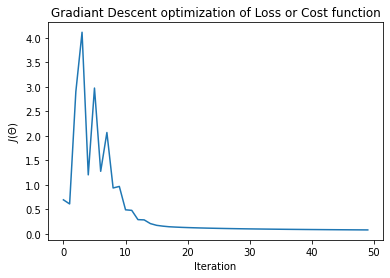

In [ ]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Gradiant Descent optimization of Loss or Cost function")

The Avobe graph indicates the decrease of loss with incresing itarartions.

### Prediction

In [ ]:
def predict(theta, x_new , threshold):
    result = x_new.dot(theta)
    result = result >= threshold
    y_pred = np.zeros(result.shape[0])
    y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
    for i in range(len(y_pred)):
        if result[i] == True:
            y_pred[i,:] = 1
        else:
            continue

    return y_pred


### Accuracy on training set

In [ ]:
def accuracy_calc(y_pred,y_pred_sk, y_test):
    count = 0
    correctly_classified = 0
    correctly_classified1 = 0

    for count in range( np.size( y_pred ) ) :
        if y_test[count] == y_pred[count] :
            correctly_classified = correctly_classified + 1

        if y_test[count] == y_pred_sk[count] :
            correctly_classified1 = correctly_classified1 + 1

        count = count + 1

    accuracy=(correctly_classified / count ) * 100
    accuracy_sk=(correctly_classified1 / count) * 100

    return accuracy,accuracy_sk

##Prediction from the dataset
y_pred[7] yeilds the value 0 ,So it is not a smilely face image.



In [ ]:
y_pred = predict(theta,X,0.5)
print("Predicted Value):",y_pred[7])

Predicted Value): [0.]


In [ ]:
from sklearn.linear_model import LogisticRegression
model_sk = LogisticRegression()
model_sk.fit( X_train, Y_train)
y_pred_sk = model_sk.predict( X_train )

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy, accuracy_sk=accuracy_calc(y_pred,y_pred_sk,Y_train)

print( "Accuracy on train set        :  ", accuracy )


Accuracy on train set        :   97.16666666666667


In [ ]:
X_test_new=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
y_pred = predict(theta,X_test_new,0.5)

In [ ]:
accuracy, accuracy_sk=accuracy_calc(y_pred,y_pred_sk,Y_test)

print( "Accuracy on test set      :  ", accuracy )


Accuracy on test set      :   72.0


###Accuracy vs Learning Rate
np.arange(0.001,0.01,0.0008) helps to create the changing learning rate via a for loop.

In [ ]:
learn_rate=np.arange(0.001,0.01,0.0008)
acc=np.zeros(learn_rate.shape)
for i in range(learn_rate.size):
    theta , J_history = gradientDescent(X,y,initial_theta,learn_rate[i],40)
    y_pred = predict(theta,X_test_new,0.8)
    accuracy, accuracy_sk=accuracy_calc(y_pred,y_pred_sk,Y_test)
    acc[i]=accuracy
    print(np.arange(0.001,0.01,0.0008).tolist())

[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.0073999999999999995, 0.008199999999999999, 0.009000000000000001, 0.0098]
[0.001, 0.0018, 0.0026, 0.0034, 0.0042, 0.005, 0.0058, 0.006599999999999999, 0.007399999

Text(0.5, 1.0, 'Accuracy vs Learning Rate')

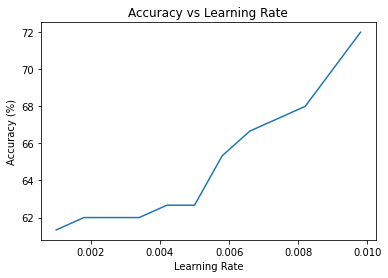

In [ ]:
plt.plot(learn_rate,acc)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Learning Rate")

As the learning_rate Accuracy increases also

###Accuracy vs Training Set Size
Similar to learning rate np.arange(100,650,50) creates ranges for train size .

In [ ]:
train_size=np.arange(100,650,50)
acc=np.zeros(train_size.shape)
for i in range(train_size.size):
    X_part=X[1:train_size[i],:]
    #print(X_part.shape)
    y_part=y[1:train_size[i],:]
    #print(y_part.shape)
    n=X_part.shape[1]
    initial_theta = np.zeros((n,1))
    #print(initial_theta.shape)
    theta , J_history = gradientDescent(X_part,y_part,initial_theta,0.007,70)
    y_pred = predict(theta,X_test_new,0.5)
    accuracy, accuracy_sk=accuracy_calc(y_pred,y_pred_sk,Y_test)
    acc[i]=accuracy
    print(np.arange(100,650,50).tolist())

[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]


Text(0.5, 1.0, 'Accuracy vs Training Set Size Graph')

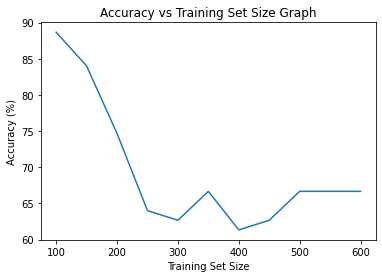

In [ ]:
plt.plot(train_size,acc)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Training Set Size Graph")

For a training set size of 100, accuracy was highest.